# アイスクリーム統計学 + Python (第１０章)

第１０章は、ストーリー（解析の流れ）を独自に作成しています。

* [アイスクリーム統計学・第１章〜第３章（散布図と相関、相関係数、無相関検定）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%82%A2%E3%82%A4%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%A0%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%91%E7%AB%A0%E3%80%9C%E7%AC%AC%EF%BC%93%E7%AB%A0.ipynb)
* [アイスクリーム統計学・第４章〜第６章（単回帰、偏相関、重回帰）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%82%A2%E3%82%A4%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%A0%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%94%E7%AB%A0%E3%80%9C%E7%AC%AC%EF%BC%96%E7%AB%A0.ipynb)
* [アイスクリーム統計学・第７章〜第９章（相関行列、因子分析1、因子分析2）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%82%A2%E3%82%A4%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%A0%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%97%E7%AB%A0%E3%80%9C%E7%AC%AC%EF%BC%99%E7%AB%A0.ipynb)
* [アイスクリーム統計学・第１０章（主成分分析とクラスター分析）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%82%A2%E3%82%A4%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%A0%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%91%EF%BC%90%E7%AB%A0.ipynb)
* [ハンバーガー統計学・第１章〜第２章（平均と分散、信頼区間）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E3%83%8F%E3%83%B3%E3%83%8F%E3%82%99%E3%83%BC%E3%82%AB%E3%82%99%E3%83%BC%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%83%BB%E7%AC%AC%EF%BC%91%E7%AB%A0%E3%80%9C%E7%AC%AC%EF%BC%92%E7%AB%A0.ipynb)

### Jupyter Notebook (IPython Notebook) とは
* Python という名のプログラミング言語が使えるプログラミング環境。計算コードと計算結果を同じ場所に時系列で保存できるので、実験系における実験ノートのように、いつどんな処理を行って何を得たのか記録して再現するのに便利。
* [当学演習室での Jupyter Notebook の起動方法](https://raw.githubusercontent.com/maskot1977/-/master/%E6%BC%94%E7%BF%92%E5%AE%A4.txt)

## 10.　主成分分析とクラスター分析

### 10.1　[主成分分析－因子分析との比較－](http://cogpsy.educ.kyoto-u.ac.jp/personal/Kusumi/datasem13/masuda2.pdf)
主成分分析と因子分析は、似て非なるものです。詳しくは上記の資料を参照のこと。

### 10.2　データの読み込み

__課題10.2__：[アイスクリームアンケート調査結果](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt)をダウンロードして、次のコードを実行してください。

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib # Python 2 の場合
# import urllib.request # Python 3 の場合

In [2]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt'

In [3]:
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'icecream_chosa.txt') # Python 2 の場合
# urllib.request.urlretrieve(url, 'icecream_chosa.txt') # Python 3 の場合

('icecream_chosa.txt', <httplib.HTTPMessage instance at 0x10401ae18>)

In [4]:
import pandas as pd # データフレームワーク処理のライブラリをインポート

In [5]:
# バニラ、ストロベリーなどアイスクリームの種類間の関係を見るための matrix を作成してください。
matrix = []
val_names = []
sta = 5
for i, line in enumerate(open("icecream_chosa.txt")):

In [6]:
# できあがったMatrixの中身を確認してください。
pd.DataFrame(matrix, index=val_names)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
vanilla,7.0,7.0,7.0,9.0,9.0,5.0,9.0,7.0,7.0,5.0,...,7.0,6.0,6.0,8.0,4.0,5.0,7.0,4.0,9.0,8.0
strawberry,7.0,8.0,4.0,6.0,5.0,7.0,7.0,7.0,7.0,5.0,...,7.0,7.0,6.0,8.0,6.0,6.0,5.0,8.0,7.0,5.0
milk_tea,8.0,9.0,3.0,6.0,7.0,5.0,6.0,6.0,4.0,9.0,...,6.0,5.0,5.0,4.0,2.0,4.0,6.0,8.0,7.0,5.0
macadamia_nuts,3.0,9.0,3.0,5.0,5.0,5.0,3.0,8.0,8.0,5.0,...,6.0,6.0,8.0,8.0,3.0,9.0,6.0,9.0,5.0,2.0
cookie,9.0,9.0,6.0,8.0,6.0,5.0,7.0,7.0,7.0,8.0,...,8.0,4.0,8.0,9.0,6.0,6.0,8.0,9.0,4.0,5.0
chocolate,9.0,9.0,4.0,6.0,8.0,7.0,9.0,6.0,7.0,8.0,...,9.0,8.0,7.0,7.0,6.0,7.0,9.0,9.0,6.0,4.0
melon,6.0,2.0,7.0,8.0,4.0,5.0,4.0,5.0,4.0,5.0,...,6.0,8.0,3.0,3.0,8.0,4.0,4.0,4.0,7.0,7.0
coffee,8.0,7.0,7.0,9.0,4.0,8.0,6.0,8.0,7.0,6.0,...,5.0,7.0,6.0,6.0,5.0,3.0,4.0,8.0,7.0,1.0
almond,3.0,7.0,6.0,6.0,4.0,5.0,5.0,7.0,6.0,3.0,...,5.0,6.0,7.0,6.0,4.0,6.0,4.0,9.0,4.0,5.0
rum_raisin,2.0,9.0,3.0,5.0,6.0,8.0,2.0,5.0,3.0,3.0,...,5.0,8.0,7.0,3.0,2.0,5.0,5.0,1.0,5.0,5.0


### 10.3　データの正規化
__課題10.3__：主成分分析に用いるデータを正規化するために、以下の関数を定義してください。

In [7]:
# 平均値を求める関数
def average(list):

In [8]:
# 分散を求める関数
def variance(list):

In [9]:
# 標準偏差を求める関数
def standard_deviation(list):

In [10]:
# リストの正規化をする（Z値に変換する）関数
def normalize(list):

In [11]:
# リストのリストの正規化をする（Z値に変換する）関数
def normalize2(list):

### 10.4　主成分分析の実行
__課題10.4__：以下のコードを実行し、得られたプロットに対して考察を行なってください。

In [12]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [14]:
#主成分分析の実行
pca = PCA()
pca.fit(normalize2(matrix))

PCA(copy=True, n_components=None, whiten=False)

In [15]:
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(normalize2(matrix))

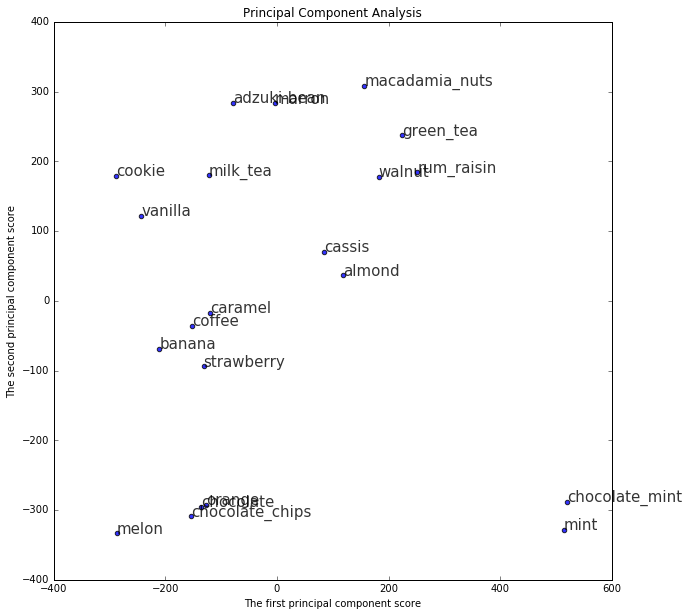

In [16]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(10, 10))
for x, y, name in zip(feature[:, 0], feature[:, 1], val_names):
    plt.text(x, y, name, alpha=0.8, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component score")
plt.ylabel("The second principal component score")
plt.show()

### 10.5　行と列を入れ替えて主成分分析
__課題10.5__:　上記の matrix の列と行を入れ替えた matrixT を作成し、主成分分析を行い、第一主成分と第二主成分でプロットしてください。また、得られたプロットに対して考察を行なってください。

### 10.6 クラスター分析
* ここでは、クラスター分析の一種である階層的クラスタリングを行ないます。
    * [クラスタリング (クラスター分析)](http://www.kamishima.net/jp/clustering/)
    * [階層的クラスタリングとは](http://image.slidesharecdn.com/140914-intel-l-141004040412-conversion-gate02/95/-12-638.jpg) 

まずは以下のコードを実行してください。

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram #必要なライブラリをインポート
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
result1 = linkage(normalize2(matrix), 
                  metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')

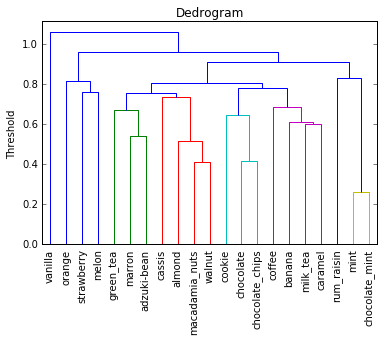

In [18]:
# デンドログラムの表示
dendrogram(result1, labels=val_names, leaf_rotation=90)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.show()

__課題10.6__：以下の問いに答えてください。
* 上記のクラスタリング結果について考察してください。
* パラーメーターを変更して、metric は correlation、methodは complete にして階層的クラスタリングを行ない、最初のクラスタリング結果と比較しながら考察してください。

__今日の課題提出__：計算結果を.ipynb ファイル（または.jsonファイル）として保存し、指定したアドレスまでメールしてください。メールタイトルは「__アイスクリーム統計学10__」とし、メール本文に学籍番号と氏名を明記のこと。また、感想も書いてくれると喜びます。今後の講義の改善につながるかも知れません。